In [17]:
# Import keras and other functionality
import tensorflow as tf
from tensorflow import random
from keras.callbacks import EarlyStopping, ModelCheckpoint

tf.keras.backend.clear_session()
random.set_seed(42)

In [18]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

# Select 55,000 datapoints for training and 5,000 datapoints for validation
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [19]:
# Preprocess training and validation data
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [20]:
loss_hyper = 0.1
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(loss_hyper)))
model.add(tf.keras.layers.Dense(100, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(loss_hyper)))
model.add(tf.keras.layers.Dense(10, activation="softmax", kernel_regularizer=tf.keras.regularizers.L2(loss_hyper)))

#model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
#model.add(tf.keras.layers.Dense(300, activation="relu"))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
#model.add(tf.keras.layers.Dense(10, activation="softmax"))
   
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 10.7696 - accuracy: 0.5921 - val_loss: 2.1421 - val_accuracy: 0.5806
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 2.0573 - accuracy: 0.5493 - val_loss: 2.0194 - val_accuracy: 0.5450
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 2.0155 - accuracy: 0.5510 - val_loss: 2.0005 - val_accuracy: 0.5628
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 2.0027 - accuracy: 0.5563 - val_loss: 1.9893 - val_accuracy: 0.5702
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.9945 - accuracy: 0.5526 - val_loss: 1.9875 - val_accuracy: 0.5732
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 1.9895 - accuracy: 0.5509 - val_loss: 1.9874 - val_accuracy: 0.5352
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 1.9854 - accuracy: 0.5475 - val_loss: 1.9798 - val_ac

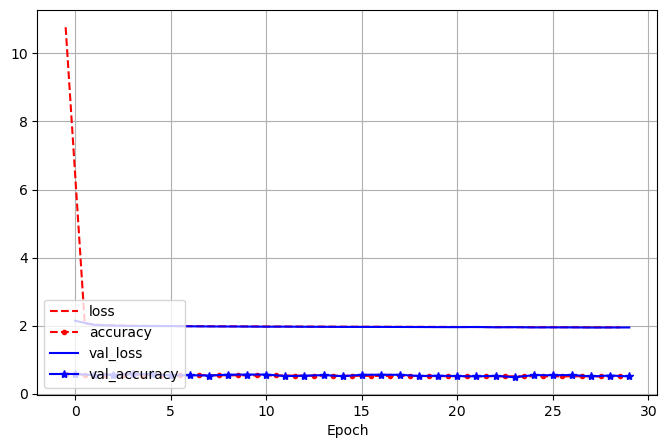

In [21]:
# Create function for plotting learning curves
import numpy as np
import matplotlib.pyplot as plt

def plot_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r--", "r--.", "b-", "b-*"]):
        epochs = np.array(history.epoch) + (0 if key.startswith("val_") else -0.5)
        plt.plot(epochs, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

plot_curves(history)

In [22]:
# Evaluate model on test data
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.9490 - accuracy: 0.5067


[1.9490386247634888, 0.5066999793052673]